In [52]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [53]:
data = pd.read_csv('data\measurements.csv')
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [54]:
data2 = pd.read_excel('data\measurements2.xlsx')
data2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [55]:
data.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [56]:
data2.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

Both files appear to have the same data, but the way the float numbers is written is different. As such, I will keep working with the file `data2`.

First I want to see how much information is missing:

In [57]:
data2.isna().sum()/len(data2)

distance         0.000000
consume          0.000000
speed            0.000000
temp_inside      0.030928
temp_outside     0.000000
specials         0.760309
gas_type         0.000000
AC               0.000000
rain             0.000000
sun              0.000000
refill liters    0.966495
refill gas       0.966495
dtype: float64

The last two columns have no information in over 90% of the lines. In this case that means that almost 97% can be done without refilling the deposit. As this information is conditional on the context of the trip (remaining fuel mainly) I will remove it.

In [58]:
cols_to_del = ['refill liters', 'refill gas']

The column `specials` contains extra information regarding the weather and the AC status. That information is already covered in `AC`, `rain` and `sun`.

In [59]:
data2.specials.value_counts(dropna=False)

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [60]:
cols_to_del.append('specials')

In [61]:
data = data2.drop(cols_to_del, 1)
data.head()

C:\Users\carlo\AppData\Local\Temp/ipykernel_7732/1844602062.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data2.drop(cols_to_del, 1)


,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [62]:
data.isna().sum()/len(data)

distance        0.000000
consume         0.000000
speed           0.000000
temp_inside     0.030928
temp_outside    0.000000
gas_type        0.000000
AC              0.000000
rain            0.000000
sun             0.000000
dtype: float64

In the `temp_inside` column there are still some missing information, but it is just a small percentage, so I will fill the gaps with the mean temperature from the column.

In [63]:
mean = round(data.temp_inside.mean(), 1)
mean

21.9

In [64]:
data.temp_inside.fillna(mean, inplace=True)
data.isna().sum()/len(data)

distance        0.0
consume         0.0
speed           0.0
temp_inside     0.0
temp_outside    0.0
gas_type        0.0
AC              0.0
rain            0.0
sun             0.0
dtype: float64

I also want to combine the temperature columns into a single value: the difference between both.

In [65]:
data['temp_diff'] = data.temp_inside - data.temp_outside

In [66]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_diff
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5


I will assume that `consume` is the liters per 100km and that `distance` is measured in km

In [74]:
data['fuel_spent'] = data.distance * data.consume/100
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_diff,fuel_spent
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084


With these changes I can start visualizing wich type of fuel has a higher consumption rate:

In [75]:
# mean_consumption = data.groupby("gas_type")["kpl"].mean()
mean_consumption = data.groupby('gas_type')[['fuel_spent', 'distance', 'consume', 'speed']].mean()

In [76]:
mean_consumption

,fuel_spent,distance,consume,speed
gas_type,,,,
E10,1.008933,21.096250,4.931250,43.506250
SP98,0.883618,18.639912,4.899123,40.820175


Here I can see that E10 usually has a higher consumption rate, but those cars also travel further and faster.

In [82]:
data.gas_type.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

According to the web https://www.dieselogasolina.com/ the prices for fuel (as of 24/3/2022) are:  
SP98 -> 1.95 €/l  
E10  -> 1.82 €/l

In [77]:
e10 = data.loc[data['gas_type'] == 'E10']
sp98 = data.loc[data['gas_type'] == 'SP98']

In [83]:
e10['cost'] = e10.fuel_spent * 1.82
sp98['cost'] = sp98.fuel_spent * 1.95

C:\Users\carlo\AppData\Local\Temp/ipykernel_7732/3863602330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e10['cost'] = e10.fuel_spent * 1.82
C:\Users\carlo\AppData\Local\Temp/ipykernel_7732/3863602330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp98['cost'] = sp98.fuel_spent * 1.95


In [84]:
e10

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_diff,fuel_spent,cost
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000,2.548000
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040,0.917280
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160,1.121120
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031,0.915642
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325,1.515150
...,...,...,...,...,...,...,...,...,...,...,...,...
344,16.1,5.1,30,25.0,16,E10,1,1,0,9.0,0.8211,1.494402
345,16.0,4.0,42,22.0,15,E10,0,0,0,7.0,0.6400,1.164800
346,15.4,4.8,40,22.0,18,E10,0,0,0,4.0,0.7392,1.345344
347,17.2,3.9,35,22.0,16,E10,0,0,0,6.0,0.6708,1.220856


<AxesSubplot:xlabel='speed', ylabel='fuel_spent'>

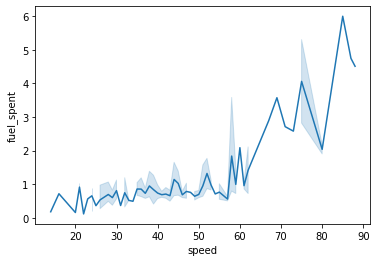

In [80]:
sns.lineplot(data=e10, x="speed", y="fuel_spent")

<AxesSubplot:xlabel='speed', ylabel='fuel_spent'>

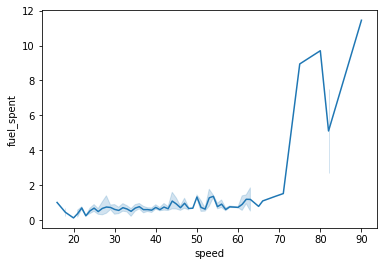

In [81]:
sns.lineplot(data=sp98, x="speed", y="fuel_spent")

In [88]:
data_clean = pd.DataFrame()
data_clean = pd.concat([e10, sp98], axis=0)

In [89]:
data_clean

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_diff,fuel_spent,cost
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000,2.548000
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040,0.917280
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160,1.121120
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031,0.915642
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325,1.515150
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920,1.154400
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923,1.349985
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080,1.185600
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084,1.381380
